In [136]:
import requests
import time
import tqdm
import pandas as pd
import os
import json
import openpyxl

In [137]:
from pathlib import Path
from zipfile import ZipFile
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
import seaborn as sns
import pandas as pd
from bs4 import BeautifulSoup

In [138]:
import pandas as pd

# Provide the full path to the CSV file
csv_file_path = r"C:\Users\dschu\OneDrive\Documenten\data_for_heatmap.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify the data
print(df)

      year + quarter    GDP  Salary  Inflation  Loan interest rate  \
0             2017K1  495.4   100.8   0.300000                0.05   
1             2017K1  495.4   100.8   0.300000                0.05   
2             2017K1  495.4   100.8   0.300000                0.05   
3             2017K1  495.4   100.8   0.300000                0.05   
4             2017K1  495.4   100.8   0.300000                0.05   
...              ...    ...     ...        ...                 ...   
64024         2023K1  558.0   115.3   0.366667                2.30   
64025         2023K1  558.0   115.3   0.366667                2.30   
64026         2023K1  558.0   115.3   0.366667                2.30   
64027         2023K1  558.0   115.3   0.366667                2.30   
64028         2023K1  558.0   115.3   0.366667                2.30   

                                         type and adress      price  rooms  \
0       Ejerlejlighed EEjerlejlighed Vejlegårdsparken...  1775000.0    3.0   
1  

In [142]:
### MODEL BUILDING ###

from sklearn.model_selection import train_test_split

#all_data # Our dataset
X = df.drop(['price', 'year + quarter', 'type and adress'], axis=1)
  # This drops the 'target' column
y = df['price'] # Our target variable
print(X)

         GDP  Salary  Inflation  Loan interest rate  rooms  year built  \
0      495.4   100.8   0.300000                0.05    3.0      1966.0   
1      495.4   100.8   0.300000                0.05    2.0      1901.0   
2      495.4   100.8   0.300000                0.05    3.0      1901.0   
3      495.4   100.8   0.300000                0.05    2.0      1962.0   
4      495.4   100.8   0.300000                0.05    5.0      1885.0   
...      ...     ...        ...                 ...    ...         ...   
64024  558.0   115.3   0.366667                2.30    4.0      1946.0   
64025  558.0   115.3   0.366667                2.30    3.0      1923.0   
64026  558.0   115.3   0.366667                2.30    3.0      1923.0   
64027  558.0   115.3   0.366667                2.30    2.0      1902.0   
64028  558.0   115.3   0.366667                2.30    1.0         0.0   

         kr/m2   m2    datetime  postal_code  
0      20640.0   86  2017-03-31       2665.0  
1      62500.0   

In [140]:
# Ridge model

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, train_test_split

# Sample data (X and y) must be provided for the code to work
# Assuming you have already defined X and y

# Splits X, y into development (2/3) and test data (1/3). We might want to change this amount.
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=(1 / 3), random_state=1)

# Define the number of splits and the size of the time window (gap)
n_splits = 3  # This is the number of splits, choose a suitable value
time_window = 1  # This is the gap size, choose a suitable value

# Create a TimeSeriesSplit with the specified gap
tscv = TimeSeriesSplit(n_splits=n_splits, gap=time_window)

mses = []  # Empty list for the MSEs

# Loop through lambda values
for lambda_ in lambdas:
    pipe_ridge = make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        Ridge(alpha=lambda_, random_state=1),
    )  # Create the pipeline (in this case, a 3rd-degree poly, Ridge, linear model, with no bias term)
    mses_test = []
    mses_train = []

    # Loop through TimeSeriesSplit folds
    for train_idx, val_idx in tscv.split(X_dev):
        X_train, y_train = X_dev.iloc[train_idx], y_dev.iloc[train_idx]  # Fix the indexing here
        X_val, y_val = X_dev.iloc[val_idx], y_dev.iloc[val_idx]  # Fix the indexing here


        pipe_ridge.fit(X_train, y_train)

        # Compute the mean squared error using the scikit-learn function
        mse_train = mean_squared_error(pipe_ridge.predict(X_train), y_train)
        mse_test = mean_squared_error(pipe_ridge.predict(X_val), y_val)

        mses_train.append(mse_train)
        mses_test.append(mse_test)

    mses.append([np.mean(mses_train), np.mean(mses_test), lambda_])

# Create df with MSE values
df_mses = pd.DataFrame(mses, columns=["MSE_train", "MSE_test", "lambda"])

# Index of the lambda that gives the lowest MSE_test in the dataframe
idx_optimal_lambda = df_mses.idxmin()["MSE_test"]
lambda_opt_test = df_mses.loc[idx_optimal_lambda]["lambda"]
opt_test_mse = df_mses.loc[idx_optimal_lambda]["MSE_test"]
print(
    f"Lowest test MSE equal to {opt_test_mse:.4f} is"
    f" achieved with lambda = {lambda_opt_test:.3f}."
)


ValueError: could not convert string to float: '2020-06-30'

In [104]:
# Ridge model with all the output

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Sample data (X and y) must be provided for the code to work
# Assuming you have already defined X and y

# Function to compute MSE
def compute_mse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

# Define the polynomial degrees
degrees = [2, 3]

# Define the range of lambda values
lambdas = np.logspace(-4, 4, 12)

# Define the number of splits
n_splits = 3  # This is the number of splits, choose a suitable value

# Create a TimeSeriesSplit with the specified number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

results = []

# Loop through polynomial degrees and lambdas
for degree in degrees:
    for lambda_ in lambdas:
        # Initialize lists to store results for each fold
        fold_mses = []

        # Loop through TimeSeriesSplit folds
        for train_idx, test_idx in tscv.split(X):
            X_train, y_train = X.iloc[train_idx], y[train_idx]
            X_test, y_test = X.iloc[test_idx], y[test_idx]

            # Create the pipeline for Ridge
            pipe_ridge = make_pipeline(
                PolynomialFeatures(degree=degree, include_bias=False),
                StandardScaler(),
                Ridge(alpha=lambda_, random_state=1),
            )

            # Fit the model
            pipe_ridge.fit(X_train, y_train)

            # Predict and compute MSE for the current fold
            y_pred = pipe_ridge.predict(X_test)
            fold_mse = compute_mse(y_test, y_pred)
            fold_mses.append(fold_mse)

        # Average the MSE across folds
        avg_mse = np.mean(fold_mses)

        # Append the results to the list
        results.append(['RIDGE', f'{degree}-deg', avg_mse, lambda_])

# Create a DataFrame to display the results
columns = ["Model", "Polynomial Degree", "Avg MSE", "Lambda"]
results_df = pd.DataFrame(results, columns=columns)
print(results_df)

# Find the index of the row with the lowest Avg MSE
min_mse_idx = results_df['Avg MSE'].idxmin()

# Get the best model's details
best_model = results_df.loc[min_mse_idx]

print("\nBest Model:")
print(best_model)


    Model Polynomial Degree   Avg MSE        Lambda
0   RIDGE             2-deg  0.083583      0.000100
1   RIDGE             2-deg  0.083583      0.000534
2   RIDGE             2-deg  0.083583      0.002848
3   RIDGE             2-deg  0.083583      0.015199
4   RIDGE             2-deg  0.083583      0.081113
5   RIDGE             2-deg  0.083582      0.432876
6   RIDGE             2-deg  0.083578      2.310130
7   RIDGE             2-deg  0.083560     12.328467
8   RIDGE             2-deg  0.083507     65.793322
9   RIDGE             2-deg  0.083431    351.119173
10  RIDGE             2-deg  0.083364   1873.817423
11  RIDGE             2-deg  0.083302  10000.000000
12  RIDGE             3-deg  0.084012      0.000100
13  RIDGE             3-deg  0.084012      0.000534
14  RIDGE             3-deg  0.084012      0.002848
15  RIDGE             3-deg  0.084011      0.015199
16  RIDGE             3-deg  0.084006      0.081113
17  RIDGE             3-deg  0.083987      0.432876
18  RIDGE   

In [105]:
# Lasso model

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit, train_test_split

# Sample data (X and y) must be provided for the code to work
# Assuming you have already defined X and y

# Splits X, y into development (2/3) and test data (1/3). We might want to change this amount.
X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=(1 / 3), random_state=1)

# Define the number of splits and the size of the time window (gap)
n_splits = 3  # This is the number of splits, choose a suitable value
time_window = 1  # This is the gap size, choose a suitable value

# Create a TimeSeriesSplit with the specified gap
tscv = TimeSeriesSplit(n_splits=n_splits, gap=time_window)

lambdas = np.logspace(-4, 4, 12)

mses = []  # Empty list for the MSEs

# Loop through lambda values
for lambda_ in lambdas:
    pipe_lasso = make_pipeline(
        PolynomialFeatures(degree=3, include_bias=False),
        StandardScaler(),
        Lasso(alpha=lambda_, random_state=1),
    )  # Create the pipeline (in this case, a 3rd-degree poly, Lasso, linear model, with no bias term)
    mses_test = []
    mses_train = []

    # Loop through TimeSeriesSplit folds
    for train_idx, val_idx in tscv.split(X_dev):
        X_train, y_train = X_dev.iloc[train_idx], y_dev[train_idx]
        X_val, y_val = X_dev.iloc[val_idx], y_dev[val_idx]

        pipe_lasso.fit(X_train, y_train)

        # Compute the mean squared error using the scikit-learn function
        mse_train = mean_squared_error(pipe_lasso.predict(X_train), y_train)
        mse_test = mean_squared_error(pipe_lasso.predict(X_val), y_val)

        mses_train.append(mse_train)
        mses_test.append(mse_test)

    mses.append([np.mean(mses_train), np.mean(mses_test), lambda_])

# Create df with MSE values
df_mses = pd.DataFrame(mses, columns=["MSE_train", "MSE_test", "lambda"])

# Index of the lambda that gives the lowest MSE_test in the dataframe
idx_optimal_lambda = df_mses.idxmin()["MSE_test"]
lambda_opt_test = df_mses.loc[idx_optimal_lambda]["lambda"]
opt_test_mse = df_mses.loc[idx_optimal_lambda]["MSE_test"]
print(
    f"Lowest test MSE equal to {opt_test_mse:.4f} is"
    f" achieved with lambda = {lambda_opt_test:.3f}."
)


Lowest test MSE equal to 0.0828 is achieved with lambda = 0.015.


In [106]:
# Lasso model with all its output

import numpy as np
import pandas as pd
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

# Sample data (X and y) must be provided for the code to work
# Assuming you have already defined X and y

# Function to compute MSE
def compute_mse(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

# Define the polynomial degrees
degrees = [2, 3]

# Define the range of lambda values
lambdas = np.logspace(-4, 4, 12)

# Define the number of splits
n_splits = 3  # This is the number of splits, choose a suitable value

# Create a TimeSeriesSplit with the specified number of splits
tscv = TimeSeriesSplit(n_splits=n_splits)

results = []

# Loop through polynomial degrees and lambdas
for degree in degrees:
    for lambda_ in lambdas:
        # Initialize lists to store results for each fold
        fold_mses = []

        # Loop through TimeSeriesSplit folds
        for train_idx, test_idx in tscv.split(X):
            X_train, y_train = X.iloc[train_idx], y[train_idx]
            X_test, y_test = X.iloc[test_idx], y[test_idx]

            # Create the pipeline for Lasso
            pipe_lasso = make_pipeline(
                PolynomialFeatures(degree=degree, include_bias=False),
                StandardScaler(),
                Lasso(alpha=lambda_, random_state=1),
            )

            # Fit the model
            pipe_lasso.fit(X_train, y_train)

            # Predict and compute MSE for the current fold
            y_pred = pipe_lasso.predict(X_test)
            fold_mse = compute_mse(y_test, y_pred)
            fold_mses.append(fold_mse)

        # Average the MSE across folds
        avg_mse = np.mean(fold_mses)

        # Append the results to the list
        results.append(['LASSO', f'{degree}-deg', avg_mse, lambda_])

# Create a DataFrame to display the results
columns = ["Model", "Polynomial Degree", "Avg MSE", "Lambda"]
results_df = pd.DataFrame(results, columns=columns)
print(results_df)

# Find the index of the row with the lowest Avg MSE
min_mse_idx = results_df['Avg MSE'].idxmin()

# Get the best model's details
best_model = results_df.loc[min_mse_idx]

print("\nBest Model:")
print(best_model)


    Model Polynomial Degree   Avg MSE        Lambda
0   LASSO             2-deg  0.083537      0.000100
1   LASSO             2-deg  0.083440      0.000534
2   LASSO             2-deg  0.083330      0.002848
3   LASSO             2-deg  0.083256      0.015199
4   LASSO             2-deg  0.083256      0.081113
5   LASSO             2-deg  0.083256      0.432876
6   LASSO             2-deg  0.083256      2.310130
7   LASSO             2-deg  0.083256     12.328467
8   LASSO             2-deg  0.083256     65.793322
9   LASSO             2-deg  0.083256    351.119173
10  LASSO             2-deg  0.083256   1873.817423
11  LASSO             2-deg  0.083256  10000.000000
12  LASSO             3-deg  0.083831      0.000100
13  LASSO             3-deg  0.083526      0.000534
14  LASSO             3-deg  0.083339      0.002848
15  LASSO             3-deg  0.083256      0.015199
16  LASSO             3-deg  0.083256      0.081113
17  LASSO             3-deg  0.083256      0.432876
18  LASSO   

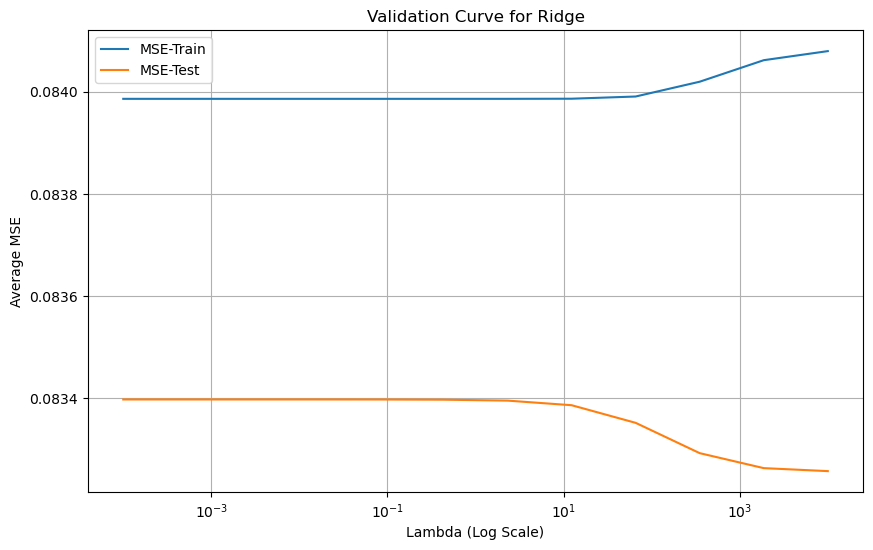

The best lambda based on the lowest test error is: 0.0001


In [108]:
# Use validation_curve to find the best lambda
train_scores, test_scores = validation_curve(
    Ridge(),
    X,
    y,
    param_name="alpha",
    param_range=lambdas,
    cv=tscv,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
)

# Convert the negative MSE scores to positive
train_scores = -train_scores
test_scores = -test_scores

# Find the index of the lambda that gives the lowest test error
min_test_error_lambda_idx = np.argmax(np.mean(test_scores, axis=1))

# Get the best lambda based on the lowest test error
best_lambda = lambdas[min_test_error_lambda_idx]

# Plot the validation curves
plt.figure(figsize=(10, 6))
plt.semilogx(lambdas, np.mean(train_scores, axis=1), label="MSE-Train")
plt.semilogx(lambdas, np.mean(test_scores, axis=1), label="MSE-Test")
plt.xlabel("Lambda (Log Scale)")
plt.ylabel("Average MSE")
plt.title("Validation Curve for Ridge")
plt.legend()
plt.grid(True)
plt.show()

# Print the best lambda found
print(f"The best lambda based on the lowest test error is: {best_lambda:.4f}")
